In [112]:
import numpy as np
from os import environ
environ["KERAS_BACKEND"] = "plaidml.keras.backend"

import keras


In [113]:
from keras import layers

import os
import time



keras.__version__

'2.2.4'

In [114]:
dsize = (256, 256)

In [115]:
from keras import layers
from keras import models

model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(dsize[0],dsize[1], 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(512, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(1024, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(2048, (3, 3), activation='relu'))

Let's display the architecture of our convnet so far:

In [116]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 41, 41, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 39, 39, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 12, 12, 64)        16448     
__________

In [117]:
model.add(layers.Flatten())
#model.add(layers.Dense(1024, activation='relu'))
#model.add(layers.Dense(10, activation='softmax'))
#model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
#model.add(layers.Dense(2, activation='softmax'))

In [118]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 41, 41, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 39, 39, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 12, 12, 64)        16448     
__________

<Figure size 720x720 with 0 Axes>

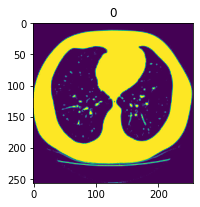

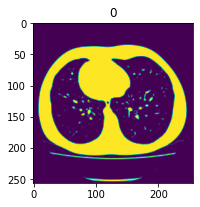

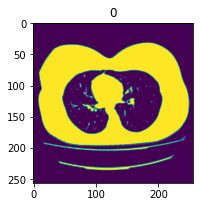

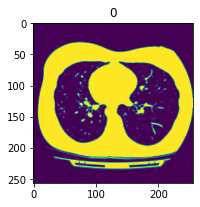

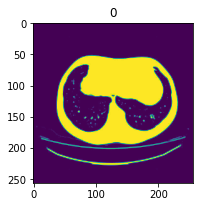

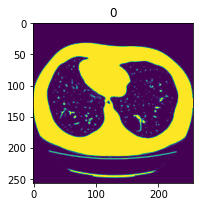

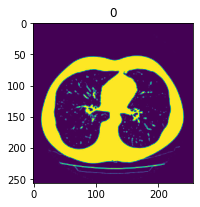

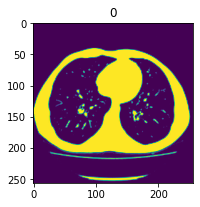

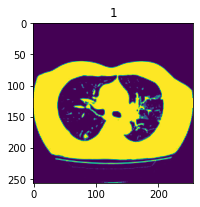

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [119]:
import cv2
import matplotlib.pyplot as plt

from skimage import color
from skimage import io


data_train = []
data_test = []
label_train = []
label_test = []
#Files_train = ['norma_train', 'lesion_train','neutral_train']
Files_train = ['norma_train', 'lesion_train']
label_val = 0

#dsize = (256, 256)

plt.figure(figsize=(10, 10))
i=0
j=0

for files in Files_train:
    cpath = os.path.join(os.getcwd(), 'lungs_ds6')
    cpath = os.path.join(cpath, files)
    for img in os.listdir(cpath):
        i=i+1
        image_array = cv2.imread(os.path.join(cpath, img), cv2.IMREAD_COLOR)
        #image_array = cv2.imread(os.path.join(cpath, img), cv2.IMREAD_GRAYSCALE)
        #image_array = cv2.imread(os.path.join(cpath, img), cv2.IMREAD_REDUCED_GRAYSCALE_8)

        # resize image
        output = cv2.resize(image_array, dsize)
        
        #MZ convert color to grayscale
        output = color.rgb2gray(output)
        
        data_train.append(output)
        label_train.append(label_val)
        
        if i%200 == 0 :
           #ax = plt.subplot(3, 3, i + 1)
           plt.figure(figsize=(10, 10))
           if j<9 :
              ax=plt.subplot(3,3,j+1)
              plt.imshow(output)
              plt.title(int(label_val))
           j=j+1
    label_val = label_val+1
    

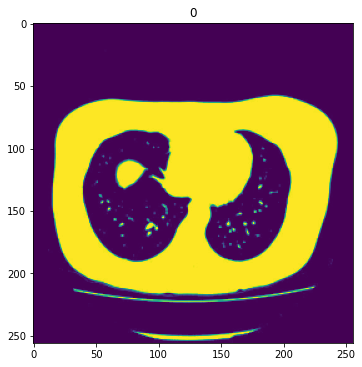

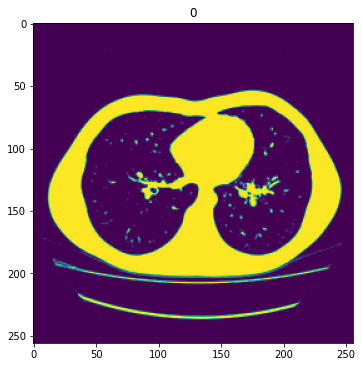

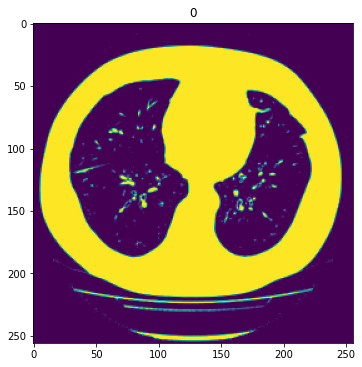

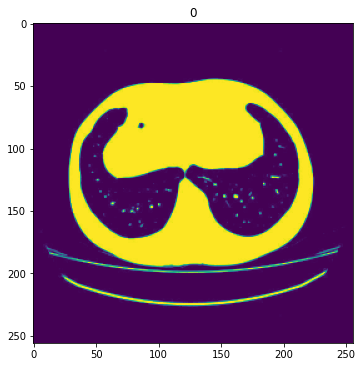

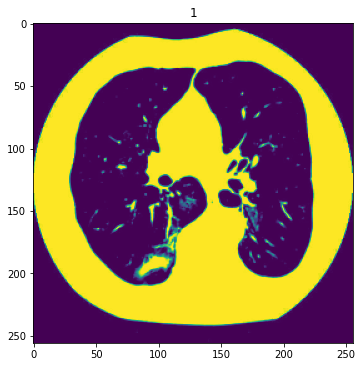

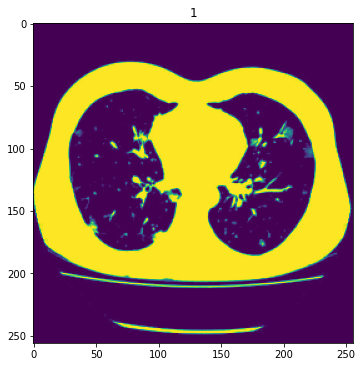

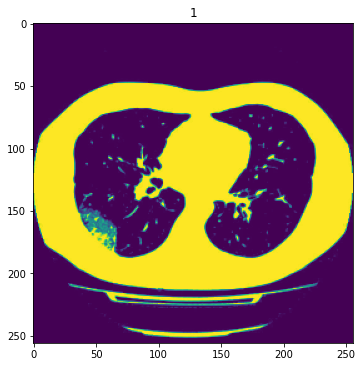

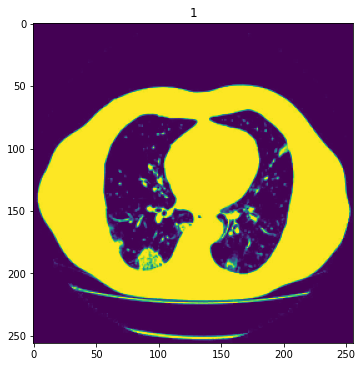

In [120]:
data_test = []
label_test = []

#Files_test = ['norma_test', 'lesion_test','neutral_test']
Files_test = ['norma_test', 'lesion_test']
label_val = 0
i=j=0

for files in Files_test:
    cpath = os.path.join(os.getcwd(), 'lungs_ds6')
    cpath = os.path.join(cpath, files)
    for img in os.listdir(cpath):
        i=i+1
        image_array = cv2.imread(os.path.join(cpath, img), cv2.IMREAD_COLOR)
        #image_array = cv2.imread(os.path.join(cpath, img), cv2.IMREAD_GRAYSCALE)
        #image_array = cv2.imread(os.path.join(cpath, img), cv2.IMREAD_REDUCED_GRAYSCALE_8)

        # resize image
        output = cv2.resize(image_array, dsize)
        
        #MZ convert color to grayscale
        output = color.rgb2gray(output)
        
        data_test.append(output)
        label_test.append(label_val)
        
        if i%100 == 0 :
           #ax = plt.subplot(3, 3, i + 1)
           plt.figure(figsize=(20, 20))
           if j<9 :
              ax=plt.subplot(3,3,j+1)
              plt.imshow(output)
              plt.title(int(label_val))
           j=j+1
    label_val = label_val + 1

In [121]:
#Convert the list to a numpy array.

data_train = np.asarray(data_train)
label_train = np.asarray(label_train)

data_test = np.asarray(data_test)
label_test = np.asarray(label_test)

In [86]:
#After importing the images you can use train_test_split to split the data for training and testing.

#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.33, random_state=42)

In [122]:
X_train = data_train
y_train = label_train
X_test = data_test
y_test = label_test


In [123]:
from sklearn.utils import shuffle
import numpy as np

X_train, y_train = shuffle(X_train, y_train)

In [124]:
X_train.shape

(3446, 256, 256)

In [125]:
X_test.shape

(830, 256, 256)

In [126]:
y_train.shape

(3446,)

In [127]:
y_test.shape[0]

830

In [128]:
train_images = X_train.reshape((X_train.shape[0], dsize[0], dsize[1], 1))
#train_images = train_images.astype('float32') / 255



In [129]:
test_images = X_test.reshape((X_test.shape[0], dsize[0], dsize[1], 1))
#train_images = train_images.astype('float32') / 255

In [95]:
from keras.utils import to_categorical

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)


In [133]:
train_labels = y_train
test_labels = y_test

In [134]:
train_images.shape

(3446, 256, 256, 1)

In [135]:
test_images.shape

(830, 256, 256, 1)

In [136]:
train_labels.shape

(3446,)

In [137]:
test_labels.shape

(830,)

In [138]:
from keras.optimizers import SGD
opt = SGD(lr=0.0005)
model.compile(loss = "binary_crossentropy", optimizer = opt,metrics=['accuracy'])

In [101]:
#from keras.optimizers import SGD
#opt = SGD(lr=0.0005)
#model.compile(loss = "categorical_crossentropy", optimizer = opt,metrics=['accuracy'])

In [102]:
#model.compile(loss = "categorical_crossentropy", optimizer = 'rmsprop',metrics=['accuracy'])

In [103]:
#model.compile(loss = "binary_crossentropy", optimizer = 'adam',metrics=['accuracy'])

===============!!!!!!!!!!FIT!!!!!!!!!!===============

In [147]:
history=model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)

Train on 3446 samples, validate on 830 samples
Epoch 1/10
3446/3446 [==============================] - 25s 7ms/step - loss: 0.3763 - acc: 0.8268 - val_loss: 0.5298 - val_acc: 0.7446
Epoch 2/10
3446/3446 [==============================] - 25s 7ms/step - loss: 0.3765 - acc: 0.8288 - val_loss: 0.5545 - val_acc: 0.7253
Epoch 3/10
3446/3446 [==============================] - 25s 7ms/step - loss: 0.3844 - acc: 0.8241 - val_loss: 0.5289 - val_acc: 0.7446
Epoch 4/10
3446/3446 [==============================] - 25s 7ms/step - loss: 0.3625 - acc: 0.8387 - val_loss: 0.5234 - val_acc: 0.7578
Epoch 5/10
3446/3446 [==============================] - 25s 7ms/step - loss: 0.3723 - acc: 0.8326 - val_loss: 0.4905 - val_acc: 0.7807
Epoch 6/10
3446/3446 [==============================] - 25s 7ms/step - loss: 0.3856 - acc: 0.8227 - val_loss: 0.5138 - val_acc: 0.7614
Epoch 7/10
3446/3446 [==============================] - 25s 7ms/step - loss: 0.3796 - acc: 0.8259 - val_loss: 0.5145 - val_acc: 0.7578
Epoch 8/

Let's evaluate the model on the test data:

In [148]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

830/830 [==============================] - 1s 1ms/step


In [149]:
test_acc

0.7807228932897728

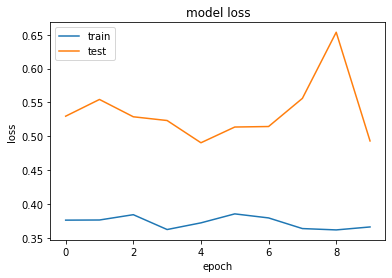

In [150]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [151]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(test_images).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_labels, y_pred_keras)

In [154]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

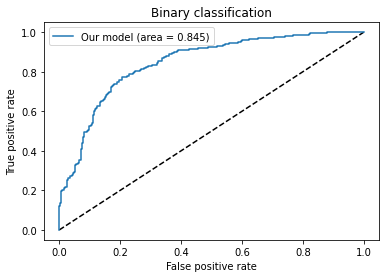

In [158]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Our model (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Binary classification')
plt.legend(loc='best')
plt.show()